In [1]:
import torch
import torch.nn as nn

from torchvision.datasets import MNIST
from torchvision import transforms

from torchsummary import summary

import matplotlib.pyplot as plt

In [3]:
train = MNIST('data', train=True, transform=transforms.ToTensor(),
              download=True)
test = MNIST('data', train=False, transform=transforms.ToTensor())

6.0%

100.0%


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100.0%
19.9%

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100.0%
100.0%


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [4]:
train.data.shape

torch.Size([60000, 28, 28])

In [5]:
train.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

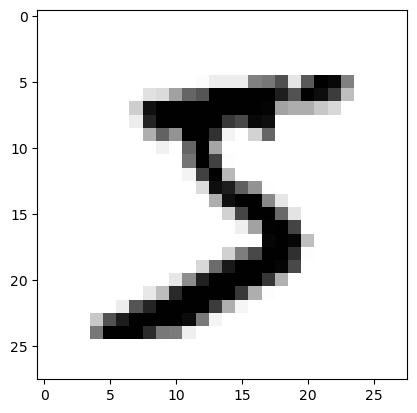

In [6]:
plt.imshow(train.data[0].numpy().squeeze(), cmap='gray_r')

In [7]:
train.targets[0:100]

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5,
        9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5, 6, 1, 0, 0, 1, 7,
        1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9, 0, 4, 6, 7, 4, 6, 8, 0,
        7, 8, 3, 1])

In [8]:
train.targets.shape

torch.Size([60000])

In [9]:
test.data.shape

torch.Size([10000, 28, 28])

In [10]:
test.targets.shape

torch.Size([10000])

### batch data

In [11]:
train_loader = torch.utils.data.DataLoader(train, batch_size=128,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(test, batch_size=128)

In [17]:
X_sample, y_sample = next(iter(train_loader))

In [19]:
y_sample.shape

torch.Size([128])

In [20]:
y_sample

tensor([6, 3, 5, 8, 0, 0, 7, 9, 6, 9, 6, 4, 1, 1, 4, 8, 2, 0, 4, 7, 3, 3, 3, 0,
        7, 8, 3, 2, 7, 9, 8, 3, 7, 1, 2, 0, 8, 3, 4, 6, 8, 7, 2, 3, 5, 4, 7, 3,
        4, 9, 1, 4, 4, 3, 1, 6, 8, 3, 1, 0, 1, 6, 6, 4, 8, 3, 2, 9, 3, 2, 1, 1,
        7, 0, 2, 8, 2, 0, 9, 9, 1, 2, 3, 2, 0, 4, 8, 8, 8, 7, 4, 0, 7, 2, 0, 5,
        8, 8, 4, 3, 5, 1, 4, 7, 8, 4, 1, 7, 5, 0, 0, 9, 2, 5, 8, 5, 3, 9, 0, 5,
        9, 8, 5, 8, 0, 2, 7, 9])

In [18]:
X_sample.shape

torch.Size([128, 1, 28, 28])

In [22]:
X_sample[0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.3059, 0.8902, 0.1098, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.6353, 0.9961, 0.2745, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [23]:
X_flat_sample = X_sample.view(X_sample.shape[0], -1)

In [24]:
X_flat_sample.shape

torch.Size([128, 784])

In [25]:
X_flat_sample[0]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.3059, 0.8902, 0.1098, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6353, 0.9961, 0.2745, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

### design neural network

In [26]:
n_input = 784
n_dense = 64
n_out = 10

In [30]:
model = nn.Sequential(
    nn.Linear(n_input, n_dense), # hidden layer
    nn.Sigmoid(), # activation
    nn.Linear(n_dense, n_out) # output layer
)

In [31]:
summary(model, (1, n_input))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 64]          50,240
           Sigmoid-2                [-1, 1, 64]               0
            Linear-3                [-1, 1, 10]             650
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.19
Estimated Total Size (MB): 0.20
----------------------------------------------------------------


In [35]:
cost_fxn = nn.CrossEntropyLoss() # includes softmax activation

In [36]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

### train

In [37]:
def accuracy_pct(pred_y, true_y):
    _, prediction = torch.max(pred_y, 1)
    correct = (prediction == true_y).sum().item()
    return (correct / true_y.shape[0]) * 100.0

In [38]:
n_batches = len(train_loader)
n_batches

469

In [41]:
n_epochs = 5

print('Training for {} epochs. \n'.format(n_epochs))

for epoch in range(n_epochs):

    avg_cost = 0.0
    avg_accuracy = 0.0

    for i, (X, y) in enumerate(train_loader):

        # forward propagation
        X_flat = X.view(X.shape[0], -1)
        y_hat = model(X_flat)
        cost = cost_fxn(y_hat, y)
        avg_cost += cost / n_batches

        # backprop
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        # calculate accuracy metric
        accuracy = accuracy_pct(y_hat, y)
        avg_accuracy += accuracy / n_batches

        if (i + 1) % 100 == 0:
            print('Step {}'.format(i + 1))

    print('Epoch {}/{} complete: Cost: {:.3f}, Accuracy: {:.1f}% \n'
          .format(epoch + 1, n_epochs, avg_cost, avg_accuracy))

print('Training complete.')

Training for 5 epochs. 

Step 100
Step 200
Step 300
Step 400
Epoch 1/5 complete: Cost: 1.104, Accuracy: 77.4% 

Step 100
Step 200
Step 300
Step 400
Epoch 2/5 complete: Cost: 0.963, Accuracy: 79.7% 

Step 100
Step 200
Step 300
Step 400
Epoch 3/5 complete: Cost: 0.859, Accuracy: 81.6% 

Step 100
Step 200
Step 300
Step 400
Epoch 4/5 complete: Cost: 0.778, Accuracy: 82.9% 

Step 100
Step 200
Step 300
Step 400
Epoch 5/5 complete: Cost: 0.715, Accuracy: 84.0% 

Training complete.


### test model

In [42]:
n_test_batches = len(test_loader)
n_test_batches

79

In [44]:
model.eval() # disables dropout (and batch norm)

with torch.no_grad(): # disables autograd, reducing memory consumption

    avg_test_cost = 0.0
    avg_test_accuracy = 0.0

    for X, y in test_loader:

        # make predictions
        X_flat = X.view(X.shape[0], -1)
        y_hat = model(X_flat)

        # calculate cost
        cost = cost_fxn(y_hat, y)
        avg_test_cost += cost / n_test_batches

        # calculate accuracy
        test_accuracy = accuracy_pct(y_hat, y)
        avg_test_accuracy += test_accuracy / n_test_batches

    print('Test cost: {:.3f}, Test accuracy: {:.1f}'
          .format(avg_test_cost, avg_test_accuracy))

Test cost: 0.669, Test accuracy: 85.1
